# Loan Prediction

## Binary Classification using Logistic Regression

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing & Loading the dataset

In [46]:
df = pd.read_csv('train.csv')

In [47]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Dataset Info:

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data cleaning

## Checking the missing Values

In [49]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df['LoanAmount'] =df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [51]:
df['Credit_History'] =df['Credit_History'].fillna(df['Credit_History'].median())

In [52]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Removing all the rows that contains null values.

In [53]:
df = df.dropna()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            542 non-null    object 
 1   Gender             542 non-null    object 
 2   Married            542 non-null    object 
 3   Dependents         542 non-null    object 
 4   Education          542 non-null    object 
 5   Self_Employed      542 non-null    object 
 6   ApplicantIncome    542 non-null    int64  
 7   CoapplicantIncome  542 non-null    float64
 8   LoanAmount         542 non-null    float64
 9   Loan_Amount_Term   542 non-null    float64
 10  Credit_History     542 non-null    float64
 11  Property_Area      542 non-null    object 
 12  Loan_Status        542 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 59.3+ KB


# Comparision between Parameters in getting the Loan

<Axes: xlabel='Property_Area', ylabel='count'>

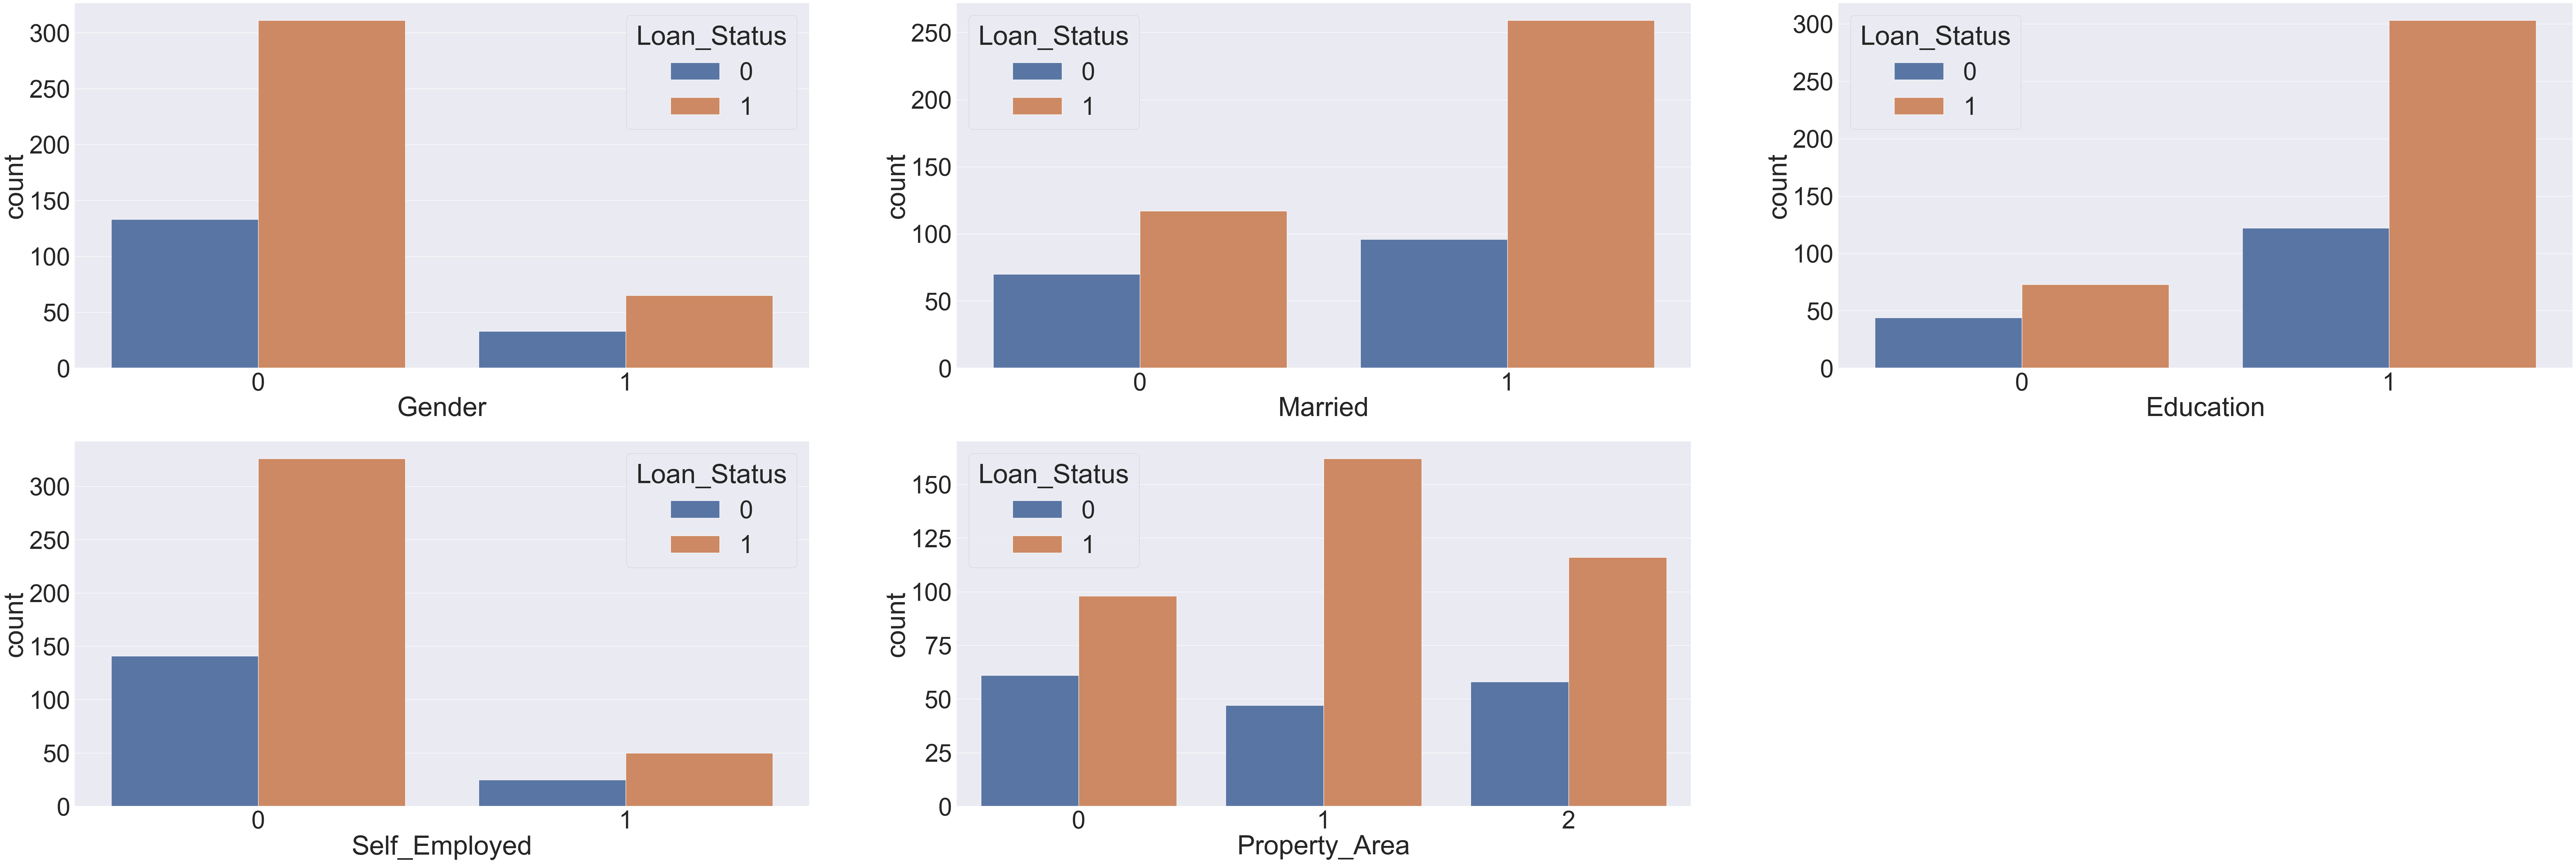

In [89]:
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(331)
sns.countplot(data=df,x=df['Gender'],hue='Loan_Status')

plt.subplot(332)
sns.countplot(data=df,x='Married', hue='Loan_Status')

plt.subplot(333)
sns.countplot(data=df,x='Education', hue="Loan_Status")

plt.subplot(334)
sns.countplot(data=df,x='Self_Employed', hue="Loan_Status")

plt.subplot(335)
sns.countplot(data=df,x='Property_Area', hue="Loan_Status")

In [56]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Let's replace the variable values to numerical form and display the value counts

In [57]:
df.Gender = df.Gender.map({"Male":0,"Female":1})

In [58]:
df.Married = df.Married.map({"Yes":1,"No":0})

In [59]:
df.Dependents = df.Dependents.map({"0":0,"1":1,"2":2,"3+":3})

In [60]:
df.Education = df.Education.map({"Graduate":1,"Not Graduate":0})

In [61]:
df.Self_Employed = df.Self_Employed.map({"Yes":1,"No":0})

In [65]:
df.Property_Area = df.Property_Area.map({"Rural":0,"Semiurban":1,"Urban":2})

In [67]:
df.Loan_Status = df.Loan_Status.map({"Y":1,"N":0})

In [68]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [80]:
df.drop(columns=["Loan_ID"],inplace=True)

In [81]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Splitting data into 70:30 ratio as training data and test data respectively

In [82]:
dataset_length = len(df)

train_x = df.iloc[0:int(0.7*dataset_length),0:11]
train_y = df.iloc[0:int(0.7*dataset_length),11]

test_x = df.iloc[int(0.7*dataset_length):,0:11]
test_y = df.iloc[int(0.7*dataset_length):,11]

In [83]:
model = LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression()

In [84]:
predictions = model.predict(test_x)

In [85]:
print(metrics.accuracy_score(predictions,test_y))

0.803680981595092


In [86]:
predictions

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [87]:
test_y

431    0
433    1
434    1
436    1
437    1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 163, dtype: int64

### Conclusion: 